In [3]:
import requests
import numpy as np
import pandas as pd
import json
import time

from dateutil.parser import parse

import datetime


import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils import class_weight

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="lightgbm")

### Import filtered dataset

In [4]:
# Read the Filtered Data file CSV from our Data Cleanup process
df = pd.read_csv('FilteredDataJuly19.csv')

In [5]:
# List the number of fraud cases per year

# Group by 'fyear' and count occurrences of 'misstate' equal to 1
fraud_per_year = df.groupby('fyear')['misstate'].apply(lambda x: (x == 1).sum()).reset_index()

# Rename the columns for clarity
fraud_per_year.columns = ['fyear', 'fraud_count']

fraud_per_year

,fyear,fraud_count
0,1990,2
1,1991,2
2,1992,3
3,1993,5
4,1994,4
5,1995,6
6,1996,5
7,1997,8
8,1998,14
9,1999,19



Training and evaluating LogisticRegression for test year 2003...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6009
Classification Report:
              precision    recall  f1-score   support

           0     0.9798    0.6843    0.8058      1061
           1     0.0429    0.5000    0.0789        30

    accuracy                         0.6792      1091
   macro avg     0.5113    0.5921    0.4424      1091
weighted avg     0.9540    0.6792    0.7858      1091



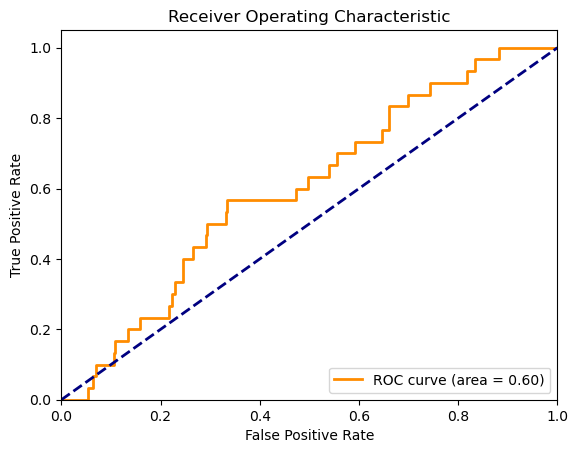

Total time for LogisticRegression: 12.37 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2003...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.9, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6064
Classification Report:
              precision    recall  f1-score   support

           0     0.9763    0.8944    0.9336      1061
           1     0.0588    0.2333    0.0940        30

    accuracy                         0.8763      1091
   macro avg     0.5176    0.5639    0.5138      1091
weighted avg     0.9511    0.8763    0.9105      1091



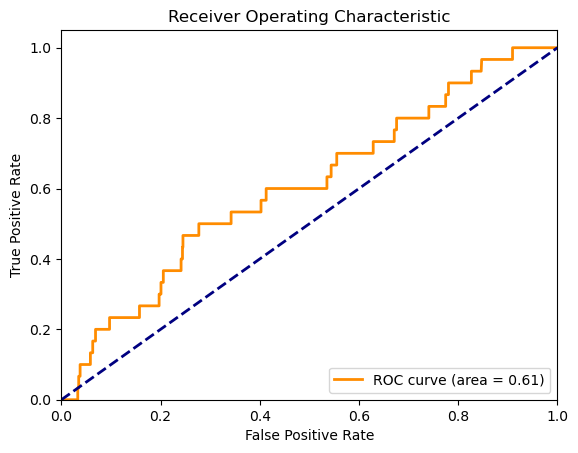

Total time for RandomForest: 113.44 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2003...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.5408
Classifi

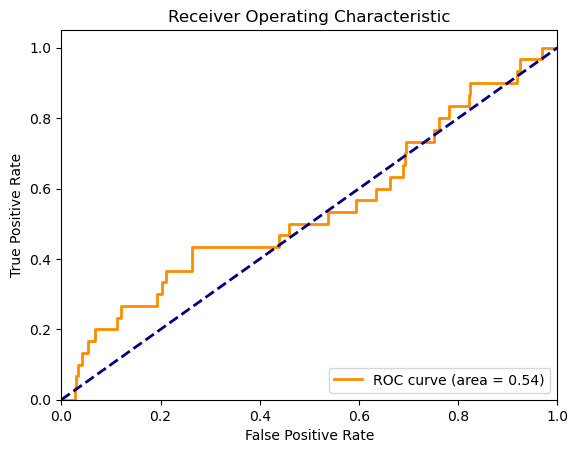

Total time for RUSBoost: 91.81 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2003...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 5, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.5928
Classification Report:
              precision    recall  f1-score   support

           0     0.9730    0.9868    0.9799      1061
           1     0.0667    0.0333    0.0444        30

    accuracy 

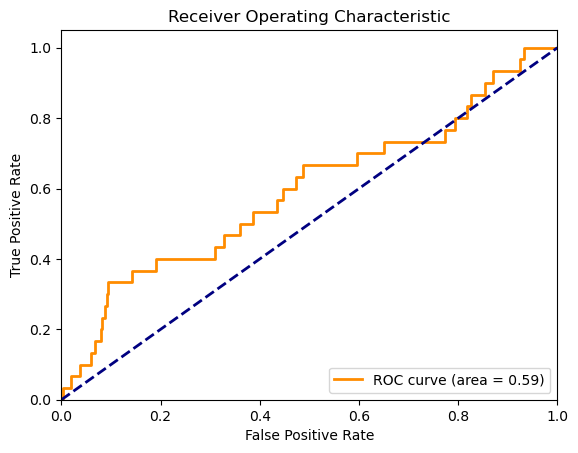

Total time for LightGBM: 20.95 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2003...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 8

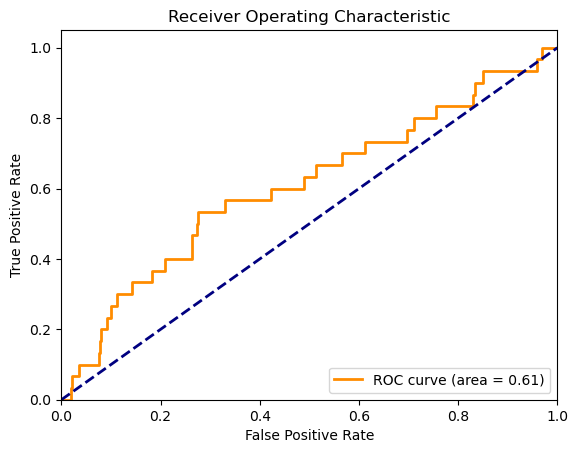

Total time for XGBoost: 26.90 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2004...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.5403
Classification Report:
              precision    recall  f1-score   support

           0     0.9857    0.6584    0.7894      1045
           1     0.0165    0.3750    0.0317        16

    accuracy                         0.6541      1061
   macro avg     0.5011    0.5167    0.4106      1061
weighted avg     0.9711    0.6541    0.7780      1061



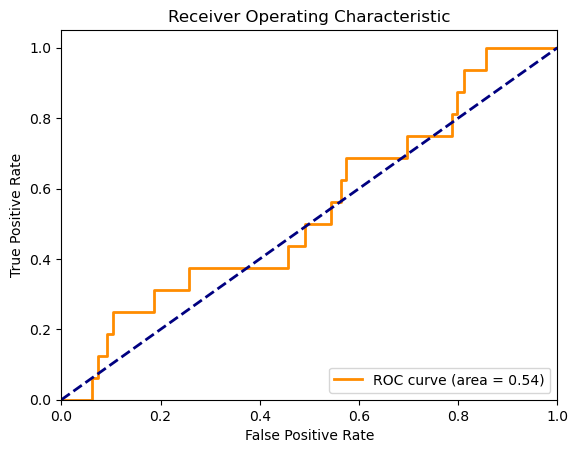

Total time for LogisticRegression: 13.64 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2004...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6169
Classification Report:
              precision    recall  f1-score   support

           0     0.9881    0.8727    0.9268      1045
           1     0.0362    0.3125    0.0649        16

    accuracy                         0.8643      1061
   macro avg     0.5122    0.5926    0.4959      1061
weighted avg     0.9737    0.8643    0.9138      1061



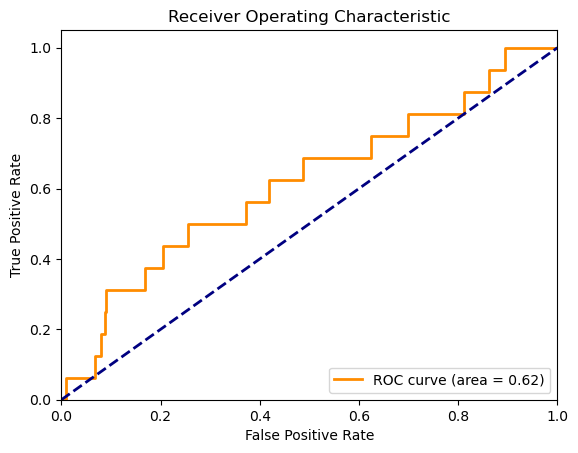

Total time for RandomForest: 128.47 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2004...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.5547
Classifi

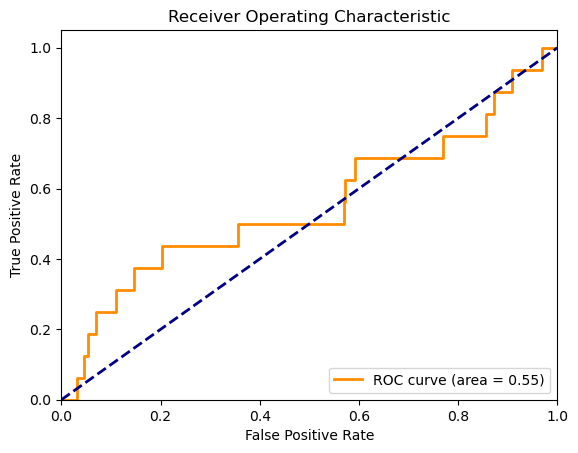

Total time for RUSBoost: 109.22 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2004...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 5, 'min_data_in_leaf': 5, 'verbose': -1}
ROC AUC: 0.6489
Classification Report:
              precision    recall  f1-score   support

           0     0.9856    0.9828    0.9842      1045
           1     0.0526    0.0625    0.0571        16

    accuracy 

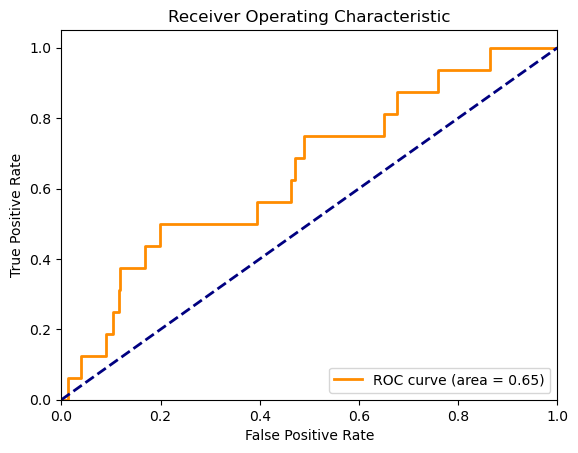

Total time for LightGBM: 20.75 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2004...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 

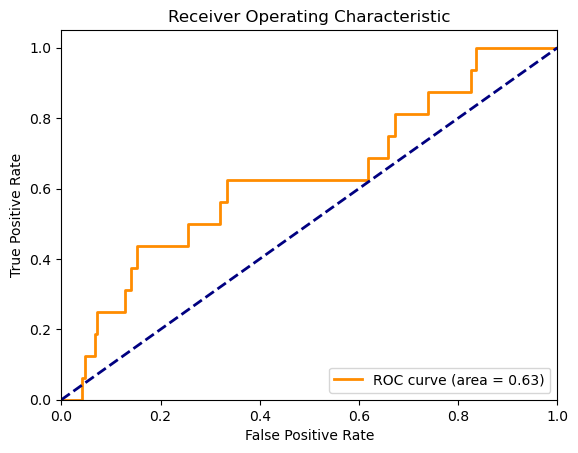

Total time for XGBoost: 30.24 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2005...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6522
Classification Report:
              precision    recall  f1-score   support

           0     0.9952    0.6004    0.7490      1046
           1     0.0118    0.6250    0.0232         8

    accuracy                         0.6006      1054
   macro avg     0.5035    0.6127    0.3861      1054
weighted avg     0.9878    0.6006    0.7434      1054



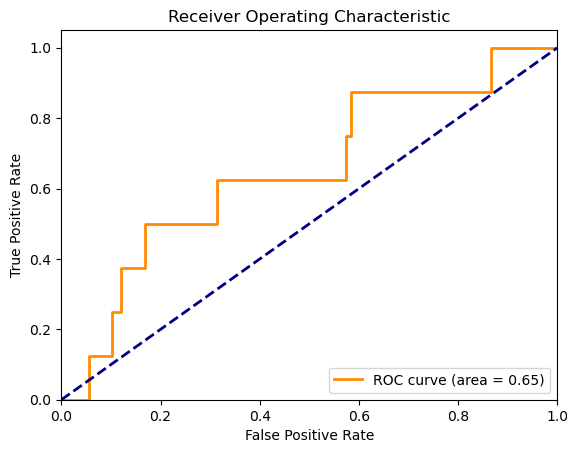

Total time for LogisticRegression: 12.79 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2005...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.9, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.7459
Classification Report:
              precision    recall  f1-score   support

           0     0.9937    0.9101    0.9501      1046
           1     0.0208    0.2500    0.0385         8

    accuracy                         0.9051      1054
   macro avg     0.5073    0.5801    0.4943      1054
weighted avg     0.9864    0.9051    0.9432      1054



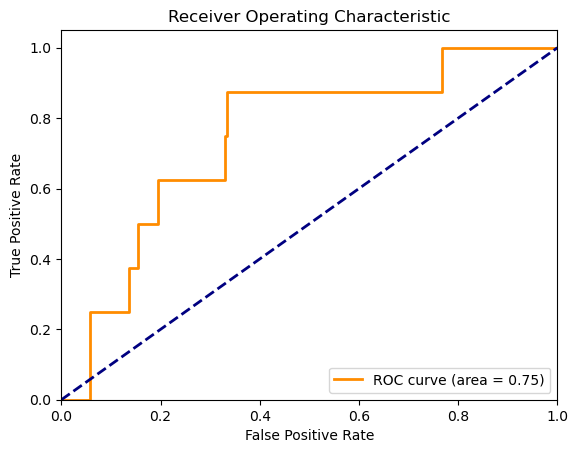

Total time for RandomForest: 149.36 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2005...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2500, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.7020
Classifi

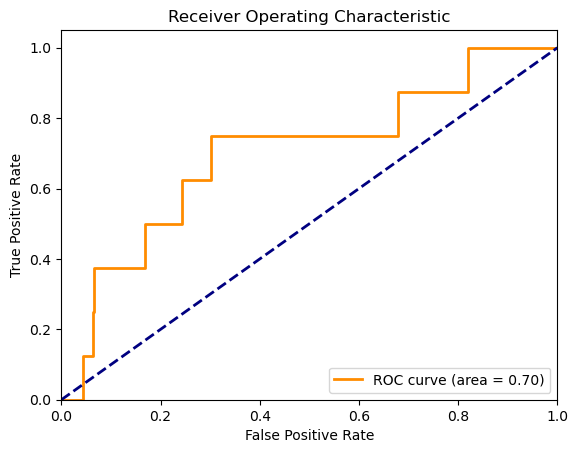

Total time for RUSBoost: 124.11 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2005...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 5, 'lambda_l2': 5, 'min_data_in_leaf': 5, 'verbose': -1}
ROC AUC: 0.7584
Classification Report:
              precision    recall  f1-score   support

           0     0.9931    0.9675    0.9801      1046
           1     0.0286    0.1250    0.0465         8

    accuracy 

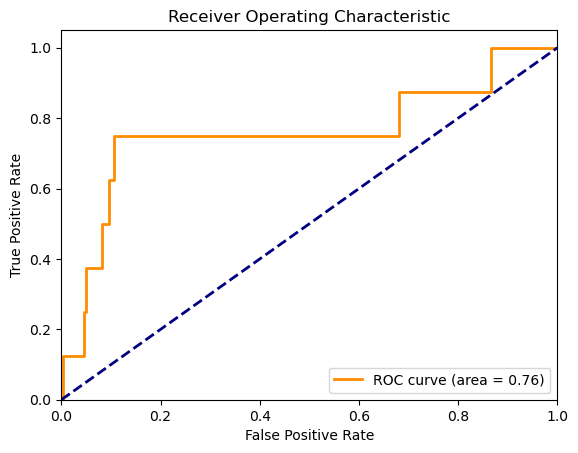

Total time for LightGBM: 22.06 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2005...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 8

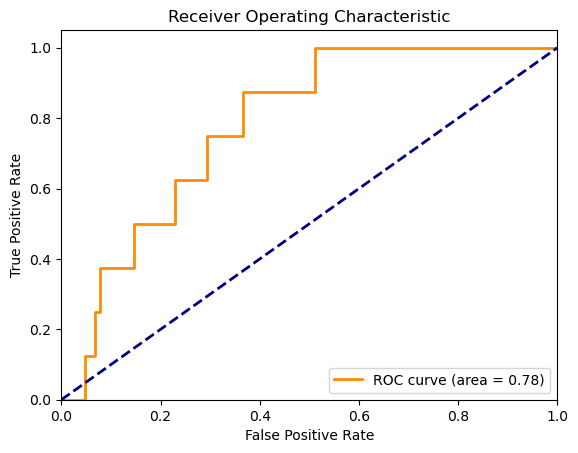

Total time for XGBoost: 33.64 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2006...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.7591
Classification Report:
              precision    recall  f1-score   support

           0     0.9983    0.5744    0.7292      1022
           1     0.0068    0.7500    0.0136         4

    accuracy                         0.5750      1026
   macro avg     0.5026    0.6622    0.3714      1026
weighted avg     0.9944    0.5750    0.7264      1026



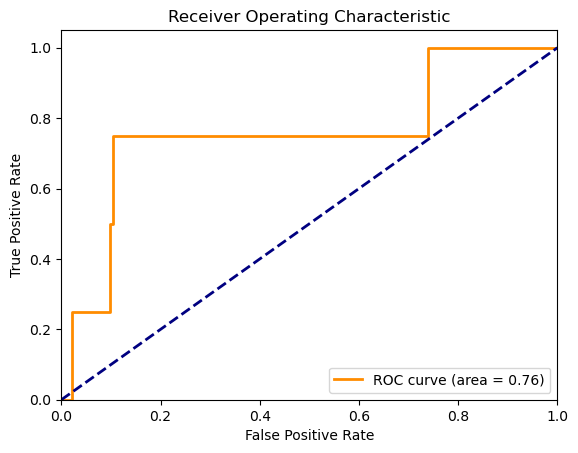

Total time for LogisticRegression: 12.70 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2006...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6627
Classification Report:
              precision    recall  f1-score   support

           0     0.9956    0.8904    0.9401      1022
           1     0.0000    0.0000    0.0000         4

    accuracy                         0.8869      1026
   macro avg     0.4978    0.4452    0.4700      1026
weighted avg     0.9917    0.8869    0.9364      1026



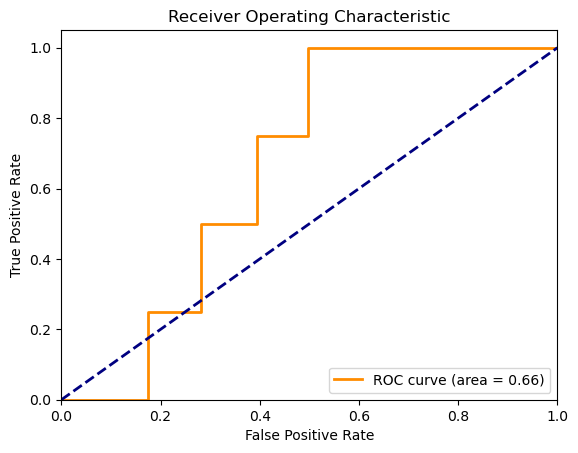

Total time for RandomForest: 1166.41 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2006...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.7114
Classif

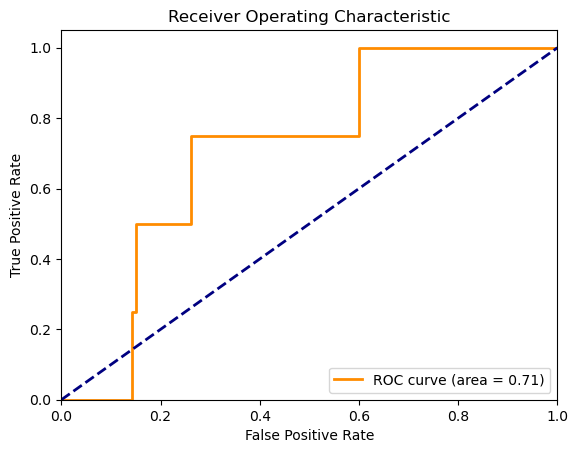

Total time for RUSBoost: 147.04 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2006...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 5, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.7123
Classification Report:
              precision    recall  f1-score   support

           0     0.9959    0.9609    0.9781      1022
           1     0.0000    0.0000    0.0000         4

    accuracy

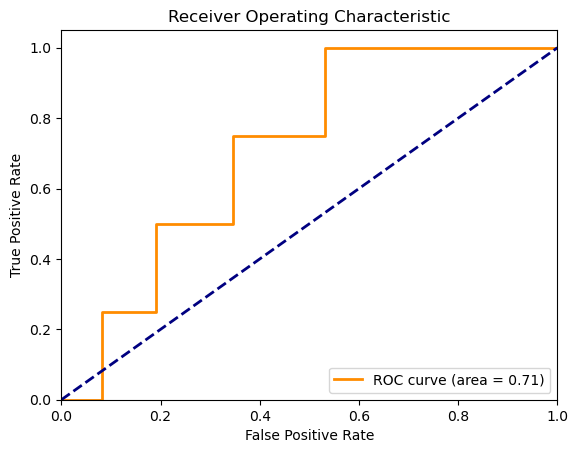

Total time for LightGBM: 28.15 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2006...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 3, 'sampling_method': None, 'scale_pos_weight': 8

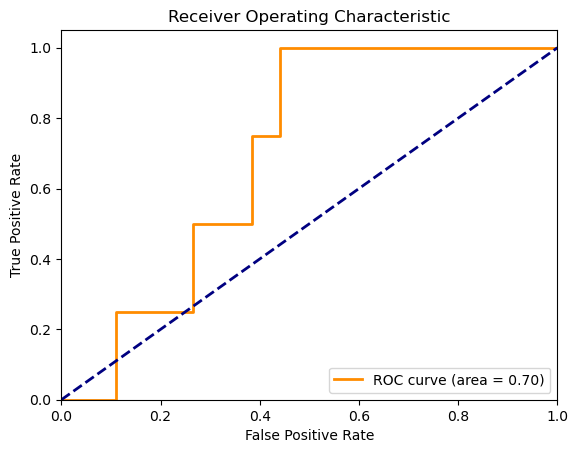

Total time for XGBoost: 39.01 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2007...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.5661
Classification Report:
              precision    recall  f1-score   support

           0     0.9961    0.5376    0.6983       958
           1     0.0023    0.3333    0.0045         3

    accuracy                         0.5369       961
   macro avg     0.4992    0.4355    0.3514       961
weighted avg     0.9930    0.5369    0.6961       961



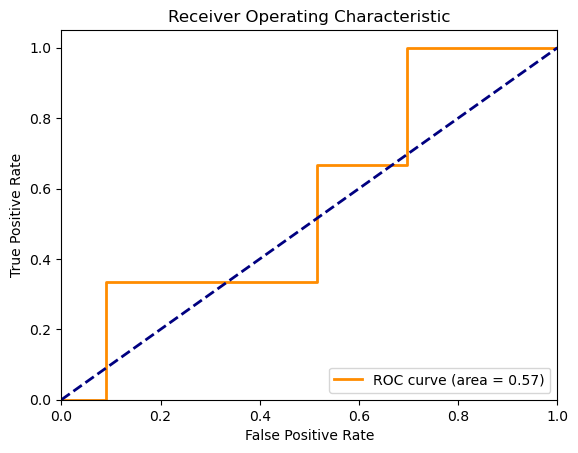

Total time for LogisticRegression: 16.75 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2007...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.9, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6517
Classification Report:
              precision    recall  f1-score   support

           0     0.9964    0.8695    0.9287       958
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.8668       961
   macro avg     0.4982    0.4348    0.4643       961
weighted avg     0.9933    0.8668    0.9258       961



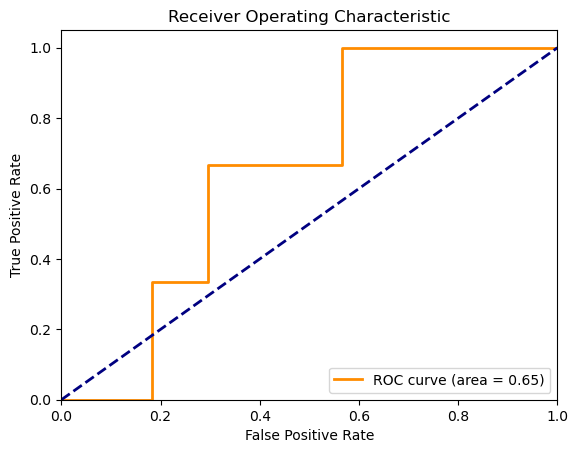

Total time for RandomForest: 206.89 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2007...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.6249
Classifi

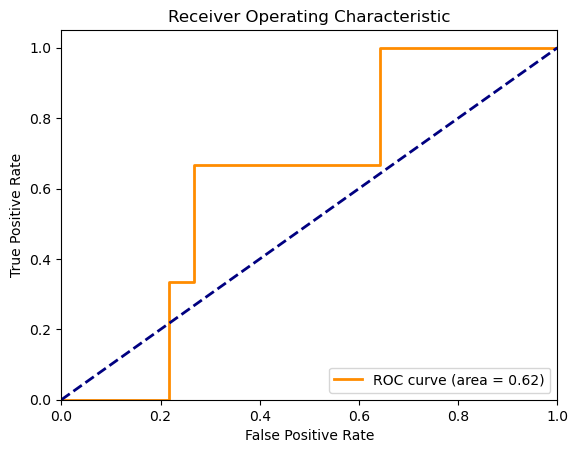

Total time for RUSBoost: 165.54 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2007...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 5, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.5776
Classification Report:
              precision    recall  f1-score   support

           0     0.9968    0.9614    0.9787       958
           1     0.0000    0.0000    0.0000         3

    accuracy

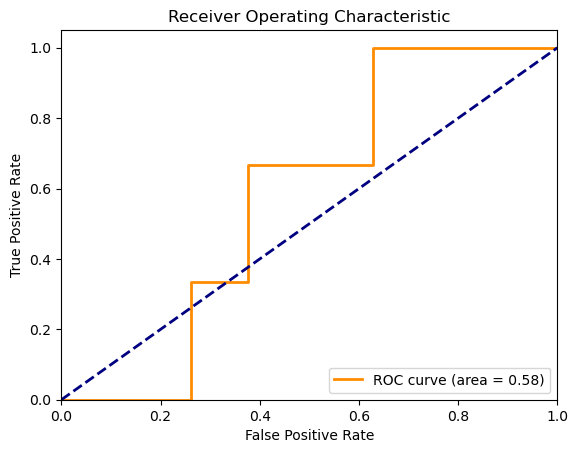

Total time for LightGBM: 34.48 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2007...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 3, 'sampling_method': None, 'scale_pos_weight': 8

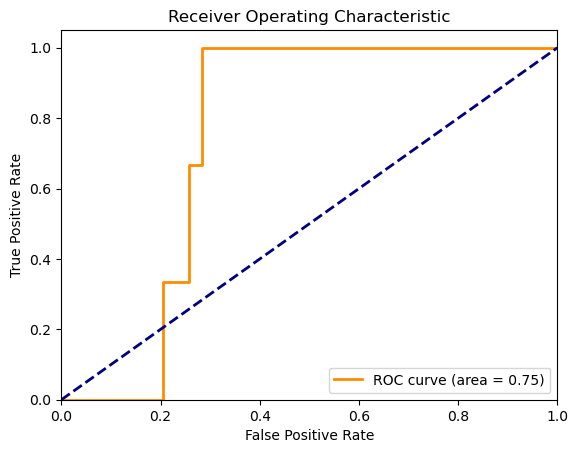

Total time for XGBoost: 39.26 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2008...
Best hyperparameters for LogisticRegression: {'C': 0.5, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6555
Classification Report:
              precision    recall  f1-score   support

           0     0.9945    0.5767    0.7301       945
           1     0.0099    0.5714    0.0195         7

    accuracy                         0.5767       952
   macro avg     0.5022    0.5741    0.3748       952
weighted avg     0.9873    0.5767    0.7248       952



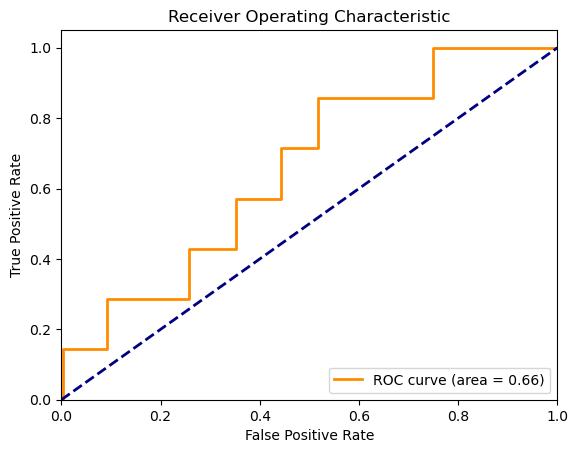

Total time for LogisticRegression: 31.95 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2008...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.7264
Classification Report:
              precision    recall  f1-score   support

           0     0.9927    0.8688    0.9266       945
           1     0.0080    0.1429    0.0152         7

    accuracy                         0.8634       952
   macro avg     0.5004    0.5058    0.4709       952
weighted avg     0.9855    0.8634    0.9199       952



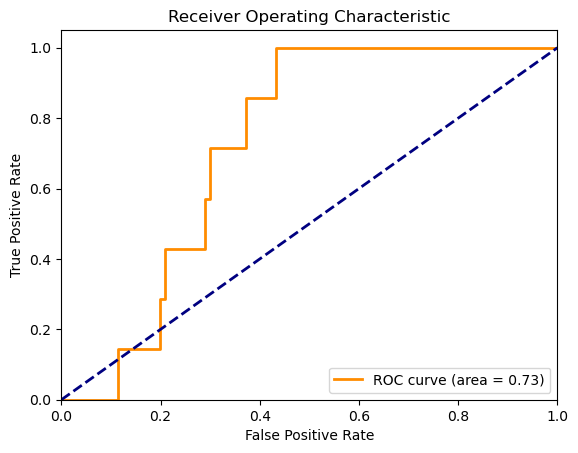

Total time for RandomForest: 225.26 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2008...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.6880
Classifi

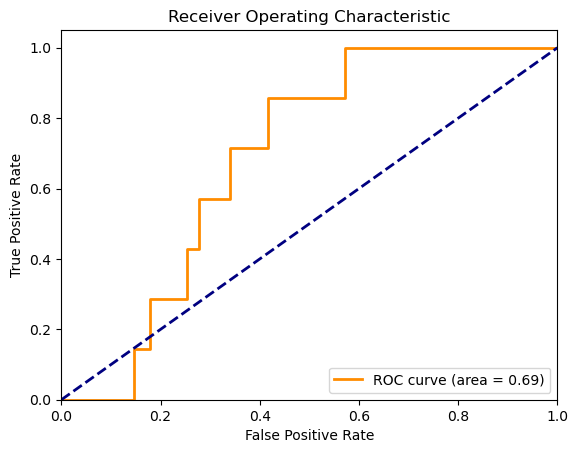

Total time for RUSBoost: 157.08 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2008...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 3, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.6385
Classification Report:
              precision    recall  f1-score   support

           0     0.9924    0.9714    0.9818       945
           1     0.0000    0.0000    0.0000         7

    accuracy

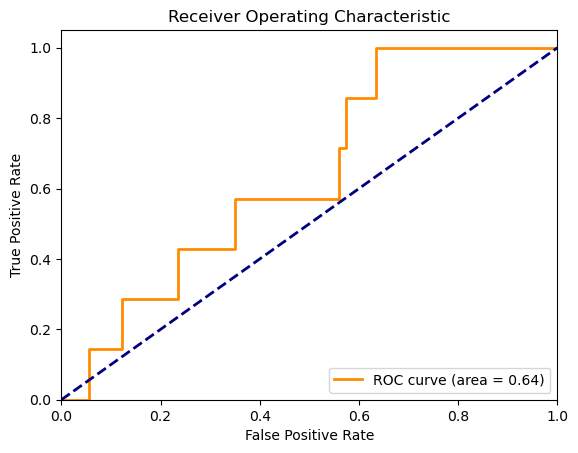

Total time for LightGBM: 31.53 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2008...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 

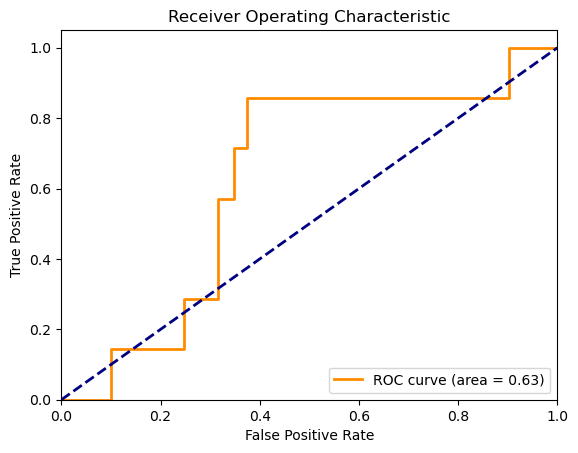

Total time for XGBoost: 40.64 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2009...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6075
Classification Report:
              precision    recall  f1-score   support

           0     0.9914    0.6310    0.7712       916
           1     0.0146    0.5000    0.0283        10

    accuracy                         0.6296       926
   macro avg     0.5030    0.5655    0.3998       926
weighted avg     0.9809    0.6296    0.7632       926



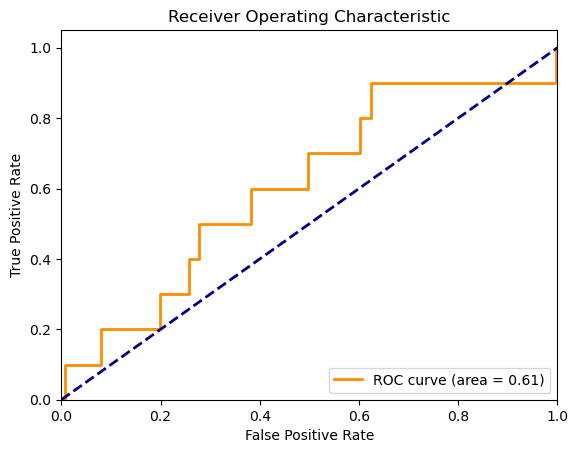

Total time for LogisticRegression: 22.33 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2009...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6594
Classification Report:
              precision    recall  f1-score   support

           0     0.9905    0.9127    0.9500       916
           1     0.0244    0.2000    0.0435        10

    accuracy                         0.9050       926
   macro avg     0.5075    0.5563    0.4967       926
weighted avg     0.9801    0.9050    0.9402       926



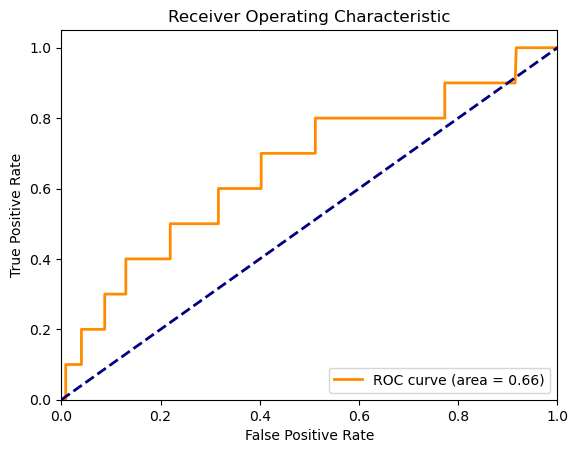

Total time for RandomForest: 238.88 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2009...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.6752
Classifi

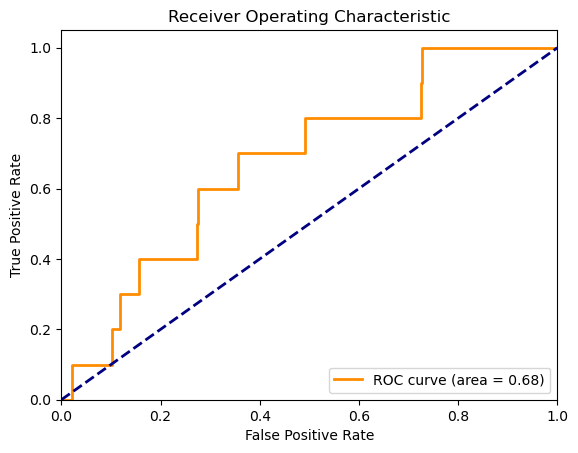

Total time for RUSBoost: 191.73 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2009...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 3, 'lambda_l2': 3, 'min_data_in_leaf': 5, 'verbose': -1}
ROC AUC: 0.6765
Classification Report:
              precision    recall  f1-score   support

           0     0.9899    0.9662    0.9779       916
           1     0.0312    0.1000    0.0476        10

    accuracy 

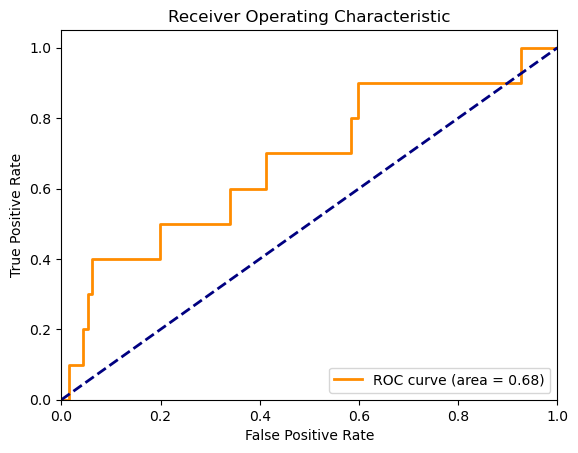

Total time for LightGBM: 32.03 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2009...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 

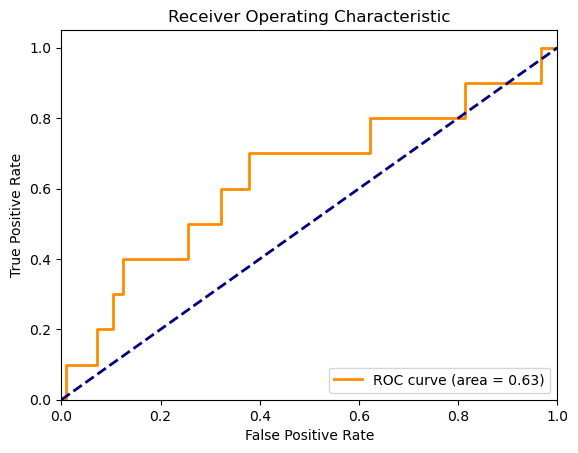

Total time for XGBoost: 41.05 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2010...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.7502
Classification Report:
              precision    recall  f1-score   support

           0     0.9948    0.6682    0.7994       865
           1     0.0205    0.6667    0.0397         9

    accuracy                         0.6682       874
   macro avg     0.5077    0.6674    0.4196       874
weighted avg     0.9848    0.6682    0.7916       874



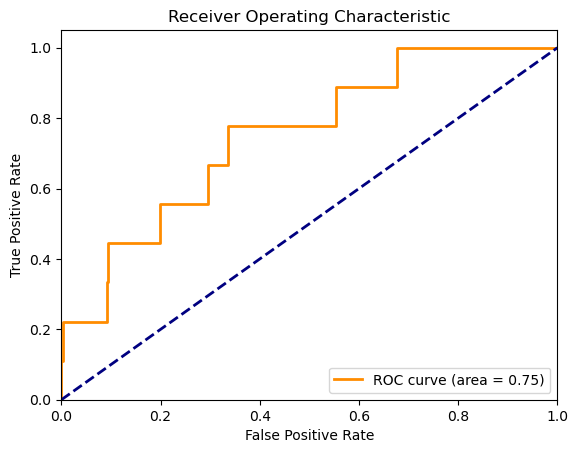

Total time for LogisticRegression: 24.37 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2010...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6425
Classification Report:
              precision    recall  f1-score   support

           0     0.9913    0.9202    0.9544       865
           1     0.0282    0.2222    0.0500         9

    accuracy                         0.9130       874
   macro avg     0.5097    0.5712    0.5022       874
weighted avg     0.9814    0.9130    0.9451       874



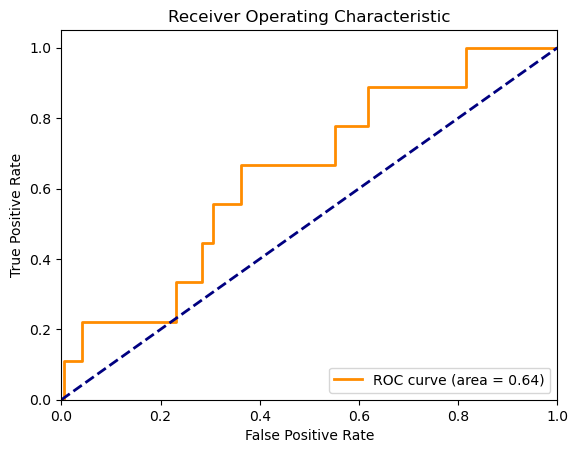

Total time for RandomForest: 255.47 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2010...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.6601
Classifi

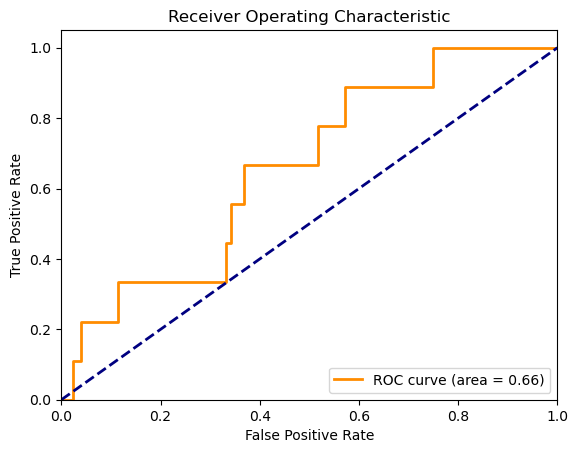

Total time for RUSBoost: 196.03 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2010...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 5, 'lambda_l2': 5, 'min_data_in_leaf': 5, 'verbose': -1}
ROC AUC: 0.6387
Classification Report:
              precision    recall  f1-score   support

           0     0.9895    0.9815    0.9855       865
           1     0.0000    0.0000    0.0000         9

    accuracy 

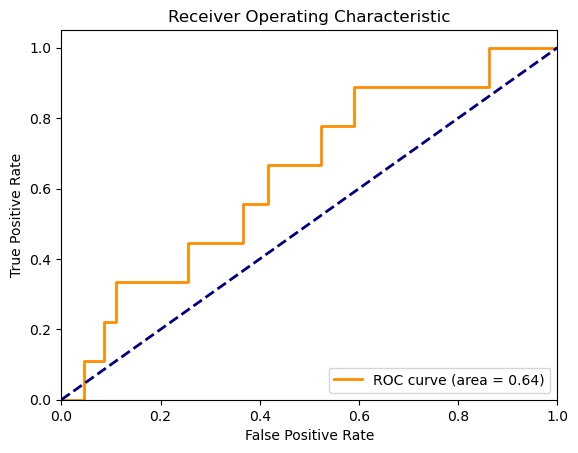

Total time for LightGBM: 30.90 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2010...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 

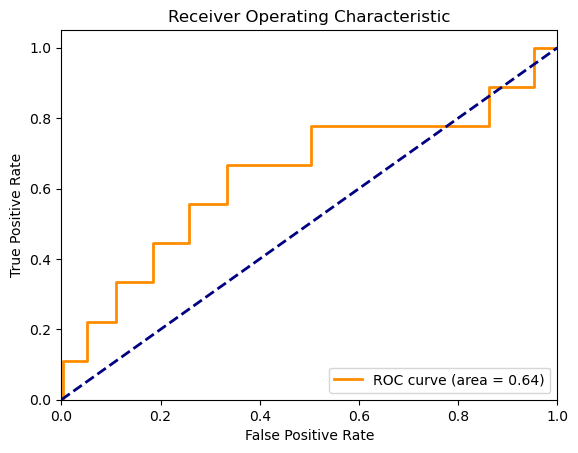

Total time for XGBoost: 41.46 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2011...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.7335
Classification Report:
              precision    recall  f1-score   support

           0     0.9964    0.6498    0.7866       848
           1     0.0198    0.7500    0.0386         8

    accuracy                         0.6507       856
   macro avg     0.5081    0.6999    0.4126       856
weighted avg     0.9873    0.6507    0.7796       856



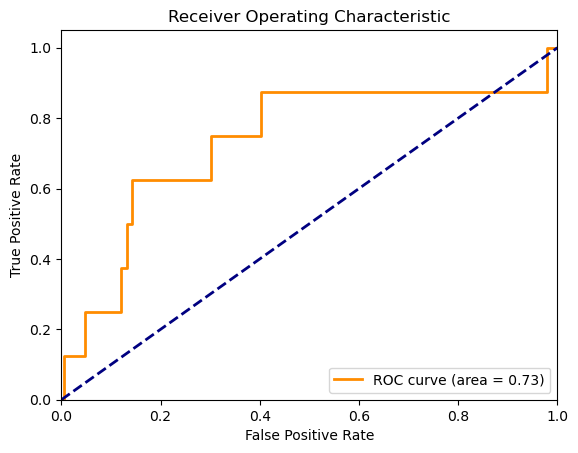

Total time for LogisticRegression: 29.98 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2011...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.9, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.6599
Classification Report:
              precision    recall  f1-score   support

           0     0.9934    0.8927    0.9404       848
           1     0.0319    0.3750    0.0588         8

    accuracy                         0.8879       856
   macro avg     0.5127    0.6338    0.4996       856
weighted avg     0.9845    0.8879    0.9321       856



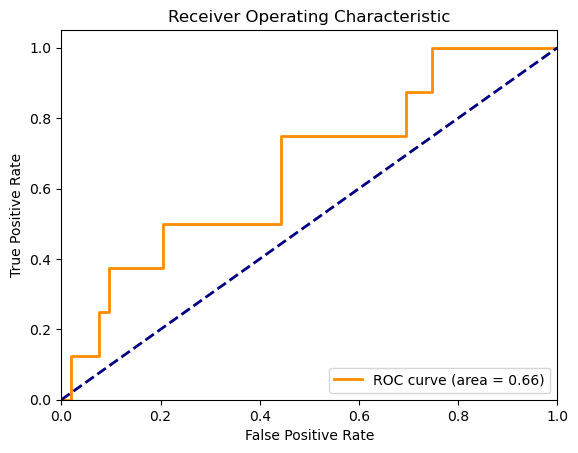

Total time for RandomForest: 268.22 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2011...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2500, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.7049
Classifi

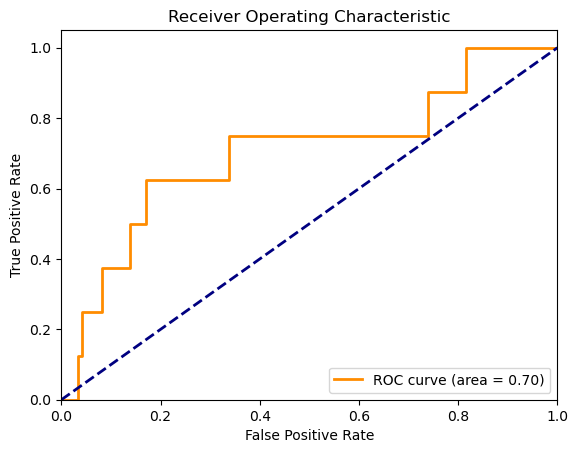

Total time for RUSBoost: 186.99 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2011...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 5, 'lambda_l2': 5, 'min_data_in_leaf': 5, 'verbose': -1}
ROC AUC: 0.6652
Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9752    0.9834       848
           1     0.0455    0.1250    0.0667         8

    accuracy 

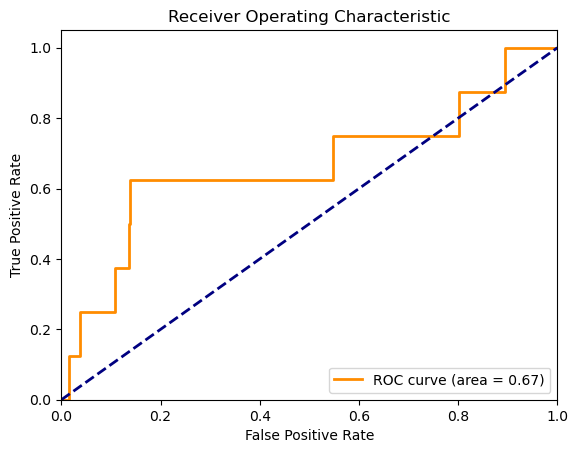

Total time for LightGBM: 29.81 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2011...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 8

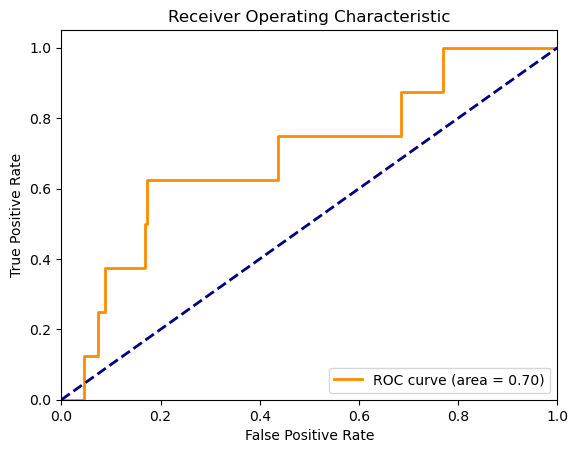

Total time for XGBoost: 41.79 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2012...
Best hyperparameters for LogisticRegression: {'C': 0.5, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.4994
Classification Report:
              precision    recall  f1-score   support

           0     0.9981    0.6103    0.7574       857
           1     0.0030    0.5000    0.0059         2

    accuracy                         0.6100       859
   macro avg     0.5005    0.5551    0.3817       859
weighted avg     0.9958    0.6100    0.7557       859



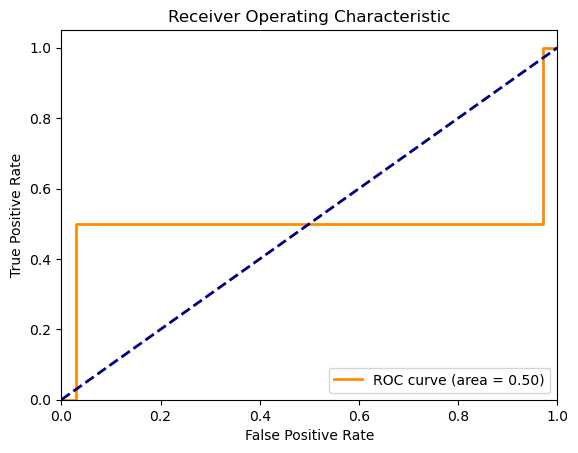

Total time for LogisticRegression: 51.62 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2012...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.4414
Classification Report:
              precision    recall  f1-score   support

           0     0.9986    0.8553    0.9214       857
           1     0.0080    0.5000    0.0157         2

    accuracy                         0.8545       859
   macro avg     0.5033    0.6777    0.4686       859
weighted avg     0.9963    0.8545    0.9193       859



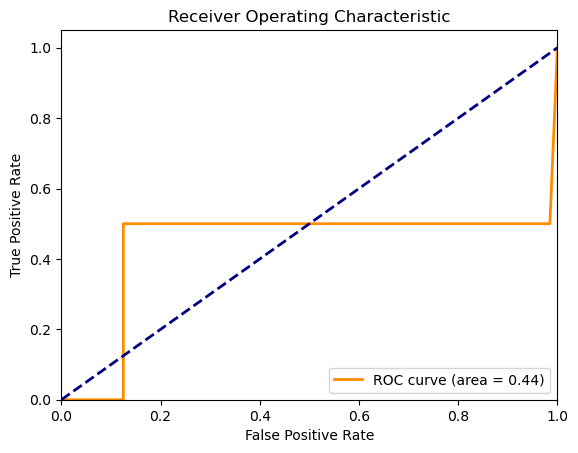

Total time for RandomForest: 290.31 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2012...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.5624
Classifi

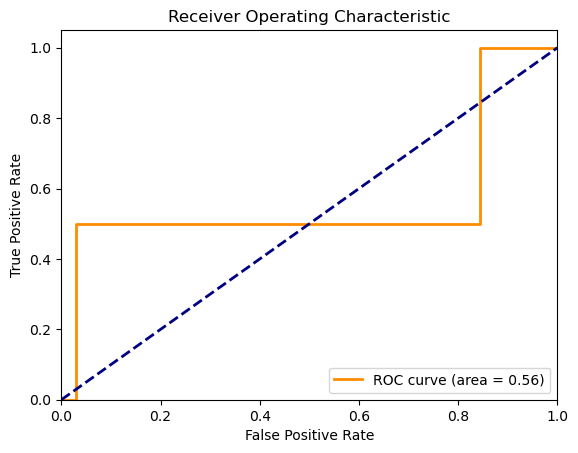

Total time for RUSBoost: 237.36 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2012...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 5, 'lambda_l2': 5, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.3845
Classification Report:
              precision    recall  f1-score   support

           0     0.9976    0.9813    0.9894       857
           1     0.0000    0.0000    0.0000         2

    accuracy

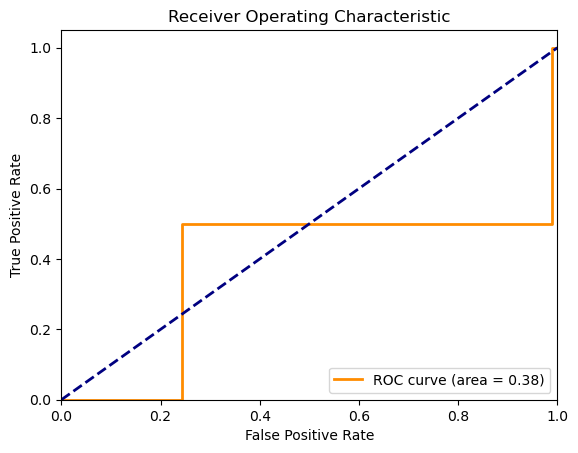

Total time for LightGBM: 33.65 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2012...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 5, 'sampling_method': None, 'scale_pos_weight': 8

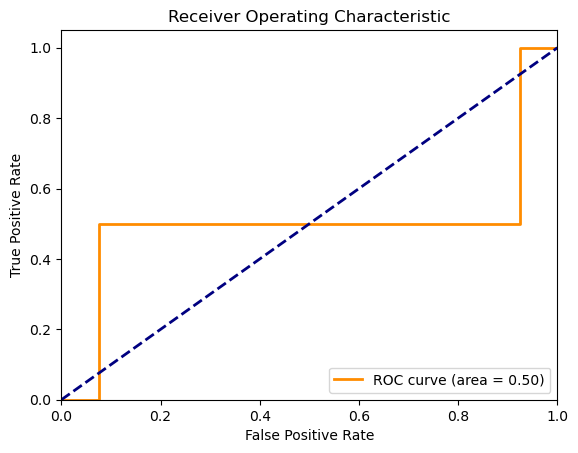

Total time for XGBoost: 46.34 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2013...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.9456
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.5448    0.7053       837
           1     0.0052    1.0000    0.0104         2

    accuracy                         0.5459       839
   macro avg     0.5026    0.7724    0.3579       839
weighted avg     0.9976    0.5459    0.7037       839



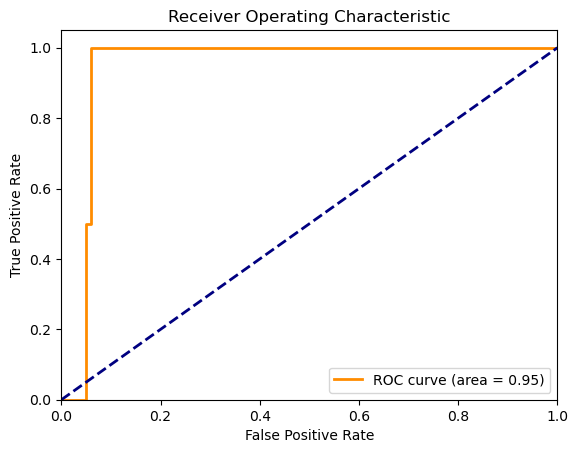

Total time for LogisticRegression: 23.48 seconds
--------------------------------------------------------------------------------

Training and evaluating RandomForest for test year 2013...
Best hyperparameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ROC AUC: 0.9217
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.8746    0.9331       837
           1     0.0187    1.0000    0.0367         2

    accuracy                         0.8749       839
   macro avg     0.5093    0.9373    0.4849       839
weighted avg     0.9977    0.8749    0.9309       839



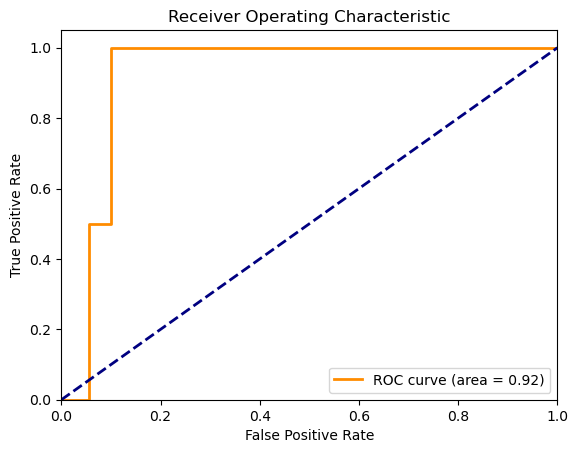

Total time for RandomForest: 313.11 seconds
--------------------------------------------------------------------------------

Training and evaluating RUSBoost for test year 2013...
Best hyperparameters for RUSBoost: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=42), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 3000, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto'}
ROC AUC: 0.9749
Classifi

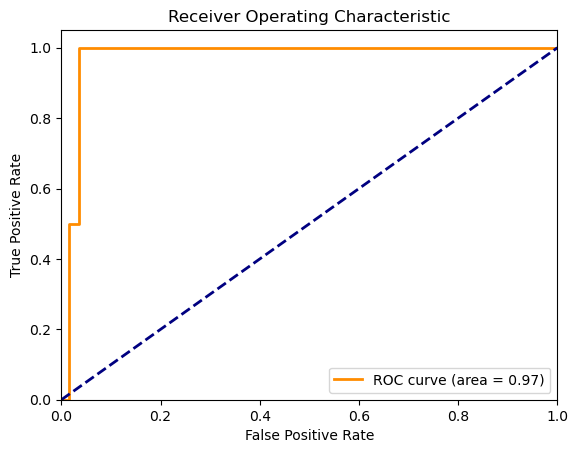

Total time for RUSBoost: 254.97 seconds
--------------------------------------------------------------------------------

Training and evaluating LightGBM for test year 2013...
Best hyperparameters for LightGBM: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'scale_pos_weight': 80.80582524271844, 'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'lambda_l1': 5, 'lambda_l2': 5, 'min_data_in_leaf': 10, 'verbose': -1}
ROC AUC: 0.9319
Classification Report:
              precision    recall  f1-score   support

           0     0.9976    0.9785    0.9879       837
           1     0.0000    0.0000    0.0000         2

    accuracy

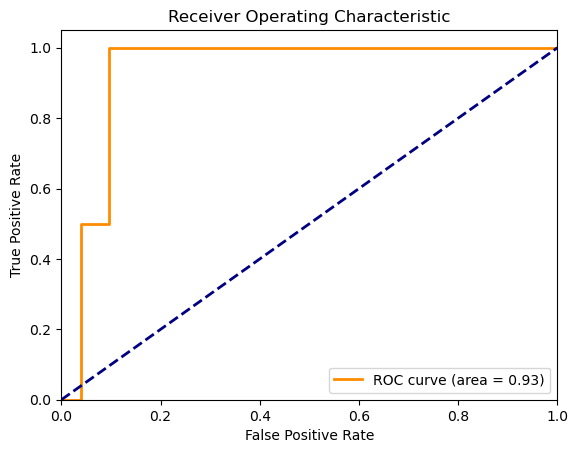

Total time for LightGBM: 37.15 seconds
--------------------------------------------------------------------------------

Training and evaluating XGBoost for test year 2013...
Best hyperparameters for XGBoost: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 3, 'reg_lambda': 3, 'sampling_method': None, 'scale_pos_weight': 

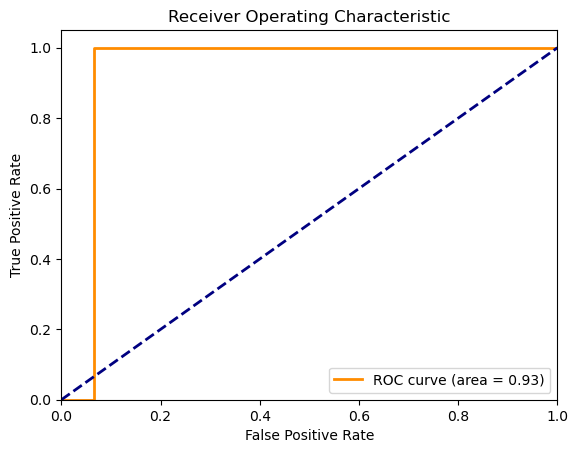

Total time for XGBoost: 49.18 seconds
--------------------------------------------------------------------------------

Training and evaluating LogisticRegression for test year 2014...
Best hyperparameters for LogisticRegression: {'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [33]:
# Define the features and target variable
features = ['act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
            'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint', 'prcc_f',
            'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets', 'dpi', 'ch_cs', 'ch_cm', 'ch_roa',
            'ch_fcf', 'reoa', 'EBIT', 'issue', 'bm', 'ordinal_ranking', 'ordinal_ranking_change']
target = 'misstate'

# Function to read and split data based on year range
def data_reader(df, start_year, end_year):
    data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    labels = data[target].values
    features_data = data[features].values
    paaers = data['p_aaer'].values
    return {'labels': labels, 'features': features_data, 'paaers': paaers}

# Function to handle serial frauds using PAAER
def handle_serial_frauds(y_train, paaer_train, paaer_test):
    y_train[np.isin(paaer_train, paaer_test)] = 0
    return y_train

# Function to perform hyperparameter tuning using GridSearchCV
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Function to evaluate the model
def evaluate(y_test, y_pred_test, y_prob_test, auc):
    print(f"ROC AUC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, digits=4))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Calculate scale_pos_weight
pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)    

# Define models and hyperparameters for GridSearchCV
models = {
    'LogisticRegression': (LogisticRegression(solver='liblinear', max_iter=3000, random_state=42, class_weight='balanced'),
                                    {'penalty': ['l1', 'l2'],'C': [0.3, 0.5]}),
                           
    'RandomForest': (RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
                            {'max_depth': [5, 6, 7],'min_samples_split': [10, 20],'min_samples_leaf': [5, 10],
                              'max_features': [0.8, 0.9]}),
                     
    'RUSBoost': (RUSBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5, random_state=42, 
                    class_weight='balanced'), random_state=42),
                 {'n_estimators': [2000, 2500, 3000],'learning_rate': [0.1]}),
                     
    'LightGBM': (lgb.LGBMClassifier(random_state=42,
                    scale_pos_weight=pos_weight),
                 {'num_leaves': [20, 31],
                  'learning_rate': [0.1, 0.5],
                  'max_depth': [5, 6],
                  'min_data_in_leaf': [5, 10],
                  'bagging_fraction': [0.8],
                  'feature_fraction': [0.8],
                  'lambda_l1': [3, 5],
                  'lambda_l2': [3, 5],
                   'verbose':[-1]}),
                     
    'XGBoost': (xgb.XGBClassifier(random_state=42,
                    scale_pos_weight=pos_weight),
                {'max_depth': [6, 7],
                 'learning_rate': [0.01, 0.1, 0.3],
                 'min_child_weight': [5, 10],
                 'min_split_loss': [0.2],
                 'subsample': [0.8],
                 'colsample_bytree': [0.8],
                 'reg_alpha': [3, 5],
                 'reg_lambda': [3, 5]})
}

# Initialize DataFrame to store results
columns = ['Model', 'Train Start Year', 'Train End Year', 'Test Year', 'AUC', 
           'Precision_0', 'Recall_0', 'F1_Score_0', 'Support_0',
           'Precision_1', 'Recall_1', 'F1_Score_1', 'Support_1', 'Model Time (s)']
columns.extend([f'Feature_{feature}_Rank' for feature in features])
results_df = pd.DataFrame(columns=columns)

# Loop through years to expand the training window and set test period
for end_train_year in range(2001, 2013):  # Training end year from 2001 to 2012
    start_train_year = 1991
    test_year = end_train_year + 2  # Test year is two years after end of training window
    
    # Read training data
    data_train = data_reader(df, start_train_year, end_train_year)
    y_train = data_train['labels']
    X_train = data_train['features']
    paaer_train = data_train['paaers']
    
    # Read testing data
    data_test = data_reader(df, test_year, test_year)
    y_test = data_test['labels']
    X_test = data_test['features']
    paaer_test = np.unique(data_test['paaers'][data_test['labels'] != 0])
    
    # Handle serial frauds using PAAER
    y_train = handle_serial_frauds(y_train, paaer_train, paaer_test)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Loop through models and evaluate
    for model_name, (model, param_grid) in models.items():
        print(f"\nTraining and evaluating {model_name} for test year {test_year}...")
        start_time = time.time()
        
        # Perform hyperparameter tuning
        best_model = perform_grid_search(model, param_grid, X_train_scaled, y_train)
        print(f"Best hyperparameters for {model_name}: {best_model.get_params()}")
        
        # Train the model
        best_model.fit(X_train_scaled, y_train)
        
        # Predict probabilities and classes
        y_prob_test = best_model.predict_proba(X_test_scaled)[:, 1]
        y_pred_test = best_model.predict(X_test_scaled)
        
        # Compute ROC AUC
        auc = roc_auc_score(y_test, y_prob_test)
        
        # Evaluate and print results
        report = classification_report(y_test, y_pred_test, digits=4, output_dict=True)
        evaluate(y_test, y_pred_test, y_prob_test, auc)
        
        end_time = time.time()
        total_time = end_time - start_time
        
        # Calculate feature importances
        if model_name == 'LogisticRegression':
            importances = np.abs(best_model.coef_[0])
        else:
            importances = best_model.feature_importances_
        
        feature_importance_rankings = np.argsort(importances)[::-1] + 1  # Rank features, higher importance first

        # Store results in DataFrame
        result_row = {
            'Model': model_name,
            'Train Start Year': start_train_year,
            'Train End Year': end_train_year,
            'Test Year': test_year,
            'AUC': auc,
            'Precision_0': report['0']['precision'],
            'Recall_0': report['0']['recall'],
            'F1_Score_0': report['0']['f1-score'],
            'Support_0': report['0']['support'],
            'Precision_1': report['1']['precision'],
            'Recall_1': report['1']['recall'],
            'F1_Score_1': report['1']['f1-score'],
            'Support_1': report['1']['support'],
            'Model Time (s)': total_time
        }
        
        for i, feature in enumerate(features):
            result_row[f'Feature_{feature}_Rank'] = feature_importance_rankings[i]
        
        results_df = results_df.append(result_row, ignore_index=True)
        
        end_time = time.time()
        print(f"Total time for {model_name}: {end_time - start_time:.2f} seconds")
        print('-' * 80)

# Save results to a CSV file
results_df.to_csv('model_evaluation_results_expanded.csv', index=False)


#### Note: in the output of the code above, the error at the end is due to the fact that there are no fraud cases in 2014 in our reduced dataset

### Analyze the results of all machine learning models with different train and test periods

In [6]:
results_df = pd.read_csv('model_evaluation_results_expanded.csv')
results_df

,Model,Train Start Year,Train End Year,Test Year,AUC,Precision_0,Recall_0,F1_Score_0,Support_0,Precision_1,...,Feature_ch_cs_Rank,Feature_ch_cm_Rank,Feature_ch_roa_Rank,Feature_ch_fcf_Rank,Feature_reoa_Rank,Feature_EBIT_Rank,Feature_issue_Rank,Feature_bm_Rank,Feature_ordinal_ranking_Rank,Feature_ordinal_ranking_change_Rank
0,LogisticRegression,1991,2001,2003,0.600911,0.979757,0.684260,0.805771,1061,0.042857,...,5,38,27,36,25,29,26,31,37,44
1,RandomForest,1991,2001,2003,0.606425,0.976337,0.894439,0.933596,1061,0.058824,...,25,30,8,4,18,36,14,20,44,41
2,RUSBoost,1991,2001,2003,0.540779,0.977513,0.696513,0.813429,1061,0.038806,...,4,36,27,14,30,20,18,12,44,41
3,LightGBM,1991,2001,2003,0.592806,0.973048,0.986805,0.979878,1061,0.066667,...,21,43,3,15,27,18,17,12,44,41
4,XGBoost,1991,2001,2003,0.608074,0.972426,0.997172,0.984644,1061,0.000000,...,37,25,23,30,18,20,8,9,44,41
5,LogisticRegression,1991,2002,2004,0.540311,0.985673,0.658373,0.789443,1045,0.016529,...,6,28,5,36,2,29,18,34,39,44
6,RandomForest,1991,2002,2004,0.616866,0.988082,0.872727,0.926829,1045,0.036232,...,35,9,25,23,18,36,20,14,44,41
7,RUSBoost,1991,2002,2004,0.554665,0.987465,0.678469,0.804311,1045,0.020408,...,15,27,25,14,30,12,20,18,44,41
8,LightGBM,1991,2002,2004,0.648864,0.985605,0.982775,0.984188,1045,0.052632,...,25,9,20,21,18,15,17,12,44,41
9,XGBoost,1991,2002,2004,0.630622,0.984674,0.983732,0.984203,1045,0.000000,...,11,38,6,36,8,20,30,9,44,41


In [7]:
# To see average performance of all test sets, per Model
model_stats = results_df.groupby('Model').mean().sort_values(by='AUC', ascending=False)
model_stats

,Train Start Year,Train End Year,Test Year,AUC,Precision_0,Recall_0,F1_Score_0,Support_0,Precision_1,Recall_1,...,Feature_ch_cs_Rank,Feature_ch_cm_Rank,Feature_ch_roa_Rank,Feature_ch_fcf_Rank,Feature_reoa_Rank,Feature_EBIT_Rank,Feature_issue_Rank,Feature_bm_Rank,Feature_ordinal_ranking_Rank,Feature_ordinal_ranking_change_Rank
Model,,,,,,,,,,,,,,,,,,,,,
XGBoost,1991.0,2006.0,2008.0,0.681963,0.991051,0.989688,0.990337,945.454545,0.029720,0.019192,...,28.818182,27.363636,27.909091,27.818182,20.454545,27.727273,20.000000,25.090909,36.272727,41.000000
RUSBoost,1991.0,2006.0,2008.0,0.672656,0.993912,0.674076,0.802996,945.454545,0.015202,0.619102,...,15.454545,18.090909,23.181818,16.090909,24.363636,21.272727,17.272727,18.000000,44.000000,41.000000
RandomForest,1991.0,2006.0,2008.0,0.666812,0.992438,0.887405,0.936838,945.454545,0.021369,0.294174,...,25.909091,23.181818,19.818182,19.727273,19.454545,23.727273,20.272727,21.090909,44.000000,41.000000
LogisticRegression,1991.0,2006.0,2008.0,0.664577,0.993670,0.612339,0.756519,945.454545,0.013934,0.597403,...,30.545455,27.181818,29.727273,29.727273,29.545455,31.000000,29.545455,31.272727,25.818182,29.181818
LightGBM,1991.0,2006.0,2008.0,0.656847,0.991196,0.973951,0.982451,945.454545,0.020416,0.040530,...,20.545455,22.000000,18.090909,13.000000,19.818182,17.090909,15.181818,12.727273,44.000000,41.000000


In [8]:
# Averages of key results, by model
key_results = model_stats[['AUC','Precision_1','Recall_1','F1_Score_1']]
key_results

,AUC,Precision_1,Recall_1,F1_Score_1
Model,,,,
XGBoost,0.681963,0.029720,0.019192,0.021891
RUSBoost,0.672656,0.015202,0.619102,0.029194
RandomForest,0.666812,0.021369,0.294174,0.037932
LogisticRegression,0.664577,0.013934,0.597403,0.026754
LightGBM,0.656847,0.020416,0.040530,0.023853


### View the importance of 'credit ratings' or 'change in credit ratings' as features in our models. Note: there are a total of 44 features, so a higher number indicates less importance. Numbers can have decimal places because these are averages of feature importance across all test periods.

In [9]:
# Average rank of credit rating features, by model (higher number means less importance)
credit_rating_features = model_stats[['Feature_ordinal_ranking_Rank','Feature_ordinal_ranking_change_Rank']]
credit_rating_features.columns = ['Credit Rating','Change in Credit Rating']
credit_rating_features

,Credit Rating,Change in Credit Rating
Model,,
XGBoost,36.272727,41.000000
RUSBoost,44.000000,41.000000
RandomForest,44.000000,41.000000
LogisticRegression,25.818182,29.181818
LightGBM,44.000000,41.000000
